In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('C:/Users/manue/Desktop/2019-Nov.csv', header = 'infer')

In [15]:
# keep only 1 row per session, parse dates

unique_sessions = df.drop_duplicates(subset=['user_session'])
unique_sessions['event_time'] = pd.to_datetime(unique_sessions.event_time)

In [16]:
# number of sessions per hour

sessions_per_hour = unique_sessions.groupby(by= unique_sessions.event_time.dt.hour, as_index= False)['event_type']
                                   .count()
                                   .reset_index()
sessions_per_hour.rename(columns={'index':'hour', 'event_type': 'sessions_per_hour'}, inplace=True)
sessions_per_hour

,hour,sessions_per_hour
0,0,7877
1,1,7290
2,2,8406
3,3,11916
4,4,17877
5,5,28928
6,6,40331
7,7,48471
8,8,53937
9,9,55709


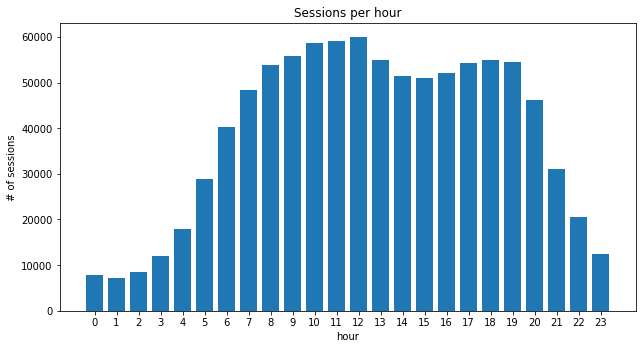

In [8]:
# plot it

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sessions_per_hour.hour, sessions_per_hour.sessions_per_hour)
fig.set_figheight(4)
fig.set_figwidth(8)
plt.title('Sessions per hour')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('hour')
plt.ylabel('# of sessions')
plt.show()

In [17]:
# number of sessions for each weekday

sessions_per_weekday = unique_sessions.groupby(unique_sessions.event_time.dt.weekday)['event_time'].count()

In [18]:
# weekdays count

unique_sessions2 = unique_sessions
unique_sessions2['event_time'] = unique_sessions2['event_time'].apply(lambda x: x.replace(hour = 0, minute=0, second=0))
unique_days = unique_sessions.drop_duplicates(subset = ['event_time'])
weekday_count = unique_days.groupby(unique_days.event_time.dt.weekday)['event_type'].count()

In [19]:
# avg sessions per hour for each weekday

avg_sessions = sessions_per_weekday / weekday_count / 24

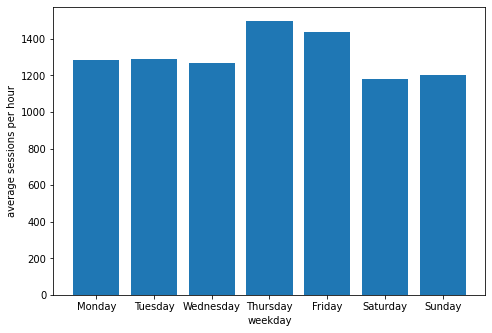

In [12]:
# plot it

WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(WEEKDAYS, avg_sessions)
plt.xlabel('weekday')
plt.ylabel('average sessions per hour')
plt.show()